## Market Segmentation with Cluster Analysis

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


We have data from a retail shop. We have a sample of 30 observations. Each observation is a different client and we have a score for their customer satisfaction and brand loyalty.

- Satisfaction (type: discrete): Self-reported. Range 1 to 10, where 10 means extremely satisfied.
- Brand loyalty) (type: continuous: Measured from the number of purchases for 1yr + other factors. Range -2.5 to 2.5 (it's standardized).

### Plot the data

Text(0, 0.5, 'Loyalty')

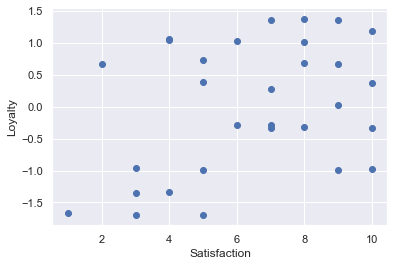

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Before going into cluster analysis, we know we can divide the graph into four squares:

- High satisfaction, Low loyalty
- Low satisfaction, Low loyalty
- Low satisfaction, High loyalty
- High satisfaction, High loyalty

At first glance, we can identify two clusters. The fist coincides with the 'Low satisfaction, Low loyalty' segment but the other cluster is all over the place.

Thus, we can anticipate that a two cluster solution won't cut it.

### Select the features

In [6]:
x = data.copy()

### Clustering

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
#the column 'cluster_pred' of 'clusters' will contain the predictions

Text(0, 0.5, 'Loyalty')

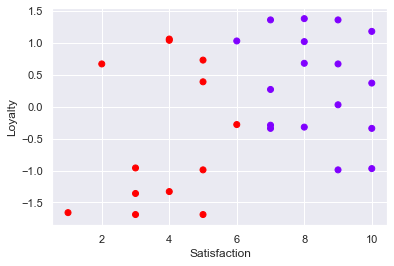

In [9]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We see two clusters, however not the two we initially imagined.

There's a cut off line at the Satisfaction score of 6.

Most probably the algorithm ONLY considered satisfaction as a feature because we didn't standardize the variable and the values are much higher than those of loyalty. KMeans disregarded loyalty as a feature

> Whenever we cluster on the basis of a single feature the result looks like this graph, as if it was cut off by a single vertical line.

## Standardize the variables

Both Satisfaction and Brand Loyalty are equally important in this example.

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

# x_scaled contains an array with the standardized 'Satisfaction and 'Loyalty values
# Loyalty values haven't changed as those were already strandardized

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

We already know the number of clusters we want to end up with.

In [16]:
wcss =[]

for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
#We will get the WCSS for 1 to 9-cluster solitions (completely arbitrarily chosen number)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.85810442178556,
 6.54983679159933,
 5.417308168183205,
 4.478466672322281,
 3.862525851810212]

Text(0, 0.5, 'Within Clusters Sum of Squares')

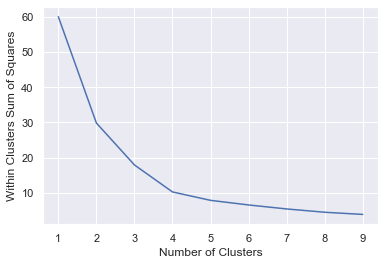

In [17]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')

We can see a few tips of the elbow at which can be interesting to investigate the solution. At 2, 3, 4 and 5 clusters

Limitation to the Elbow Method: We can see the change, but we don't really know which solution is the best one.

### Explore clustering the difference with standardized variables

In [23]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)

#Create a new data frame
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [24]:
clusters_new

#the dataframe contains the original values but the cluster prediction based on standardized data

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

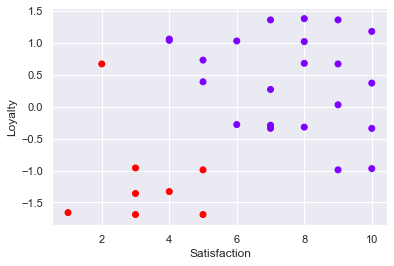

In [25]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#Keeping the original x-axis we get an intuition for how satisfied were the customers

Comparing this solution with the previous one, even if we still have two clusters, we can see both features have been taken into account (there's no one cut off line).

However, these two clusters coincide with our initial specualtion.

Solution for KMeans (2):
- Alienated: Low satisfaction, low loyalty (unlikely they will return to the shop)
- The everything else cluster: veru heterogeneous mix of people

Text(0, 0.5, 'Loyalty')

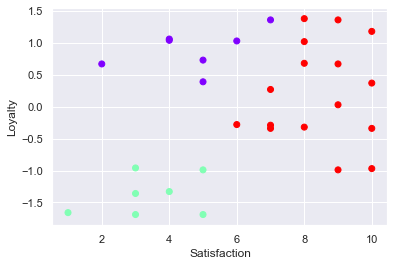

In [27]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)

#Create a new data frame
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

NEW Solution for KMeans (3):

- Alineated (we were right in identifying this one as a cluster of its own)
- Supporters: not particulalry happy but they like the brand and want to come back. It's a small cluster
- 'All that's left': still very heterogeneous

Text(0, 0.5, 'Loyalty')

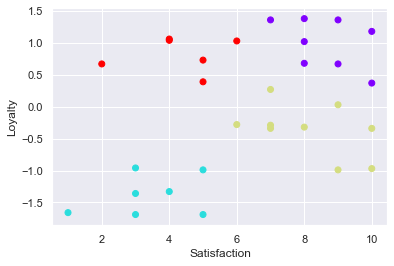

In [28]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)

#Create a new data frame
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

NEW Solution for KMeans (4):

- Alineated
- Supporters
- Fans: satisfied and loyal. These are our core customers
- Roamers: predominantly satisfied but not loyal

This solition is definitely the one we have seen so far.

Text(0, 0.5, 'Loyalty')

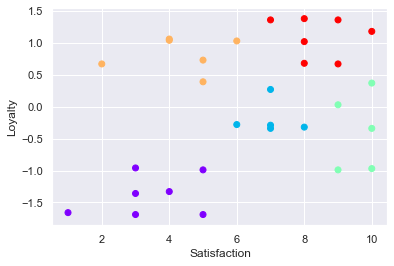

In [30]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)

#Create a new data frame
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


Solution for KMeans (5):

The Alienated, Supporters and Fans remain unchanged. This solution actually splits the Roamers into two clusters, those which are satisfied and those extremely satisfied. However, this new piece segment doesn't add too much value.

We can carry on with as many clusters as we like but from now on we would just further segment the 4 core clusters.